# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [3]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from source.spea_optimizer import SPEAOptimizer
from source.objectives import viennet_objective

In [4]:
sns.set()

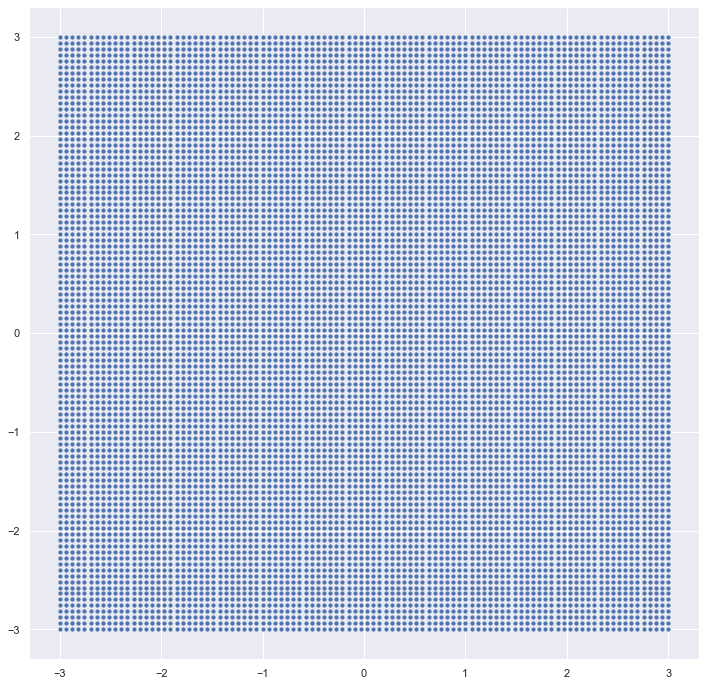

In [5]:
plt.figure(figsize=[12, 12])

x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100), sparse=False, indexing='xy')
plt.scatter(x, y, c="b", s=10)

In [6]:
grid = np.array([x, y])
grid = grid.reshape(2, 100*100)
grid = np.swapaxes(grid, 0, 1)
grid.shape

(10000, 2)

<IPython.core.display.Javascript object>


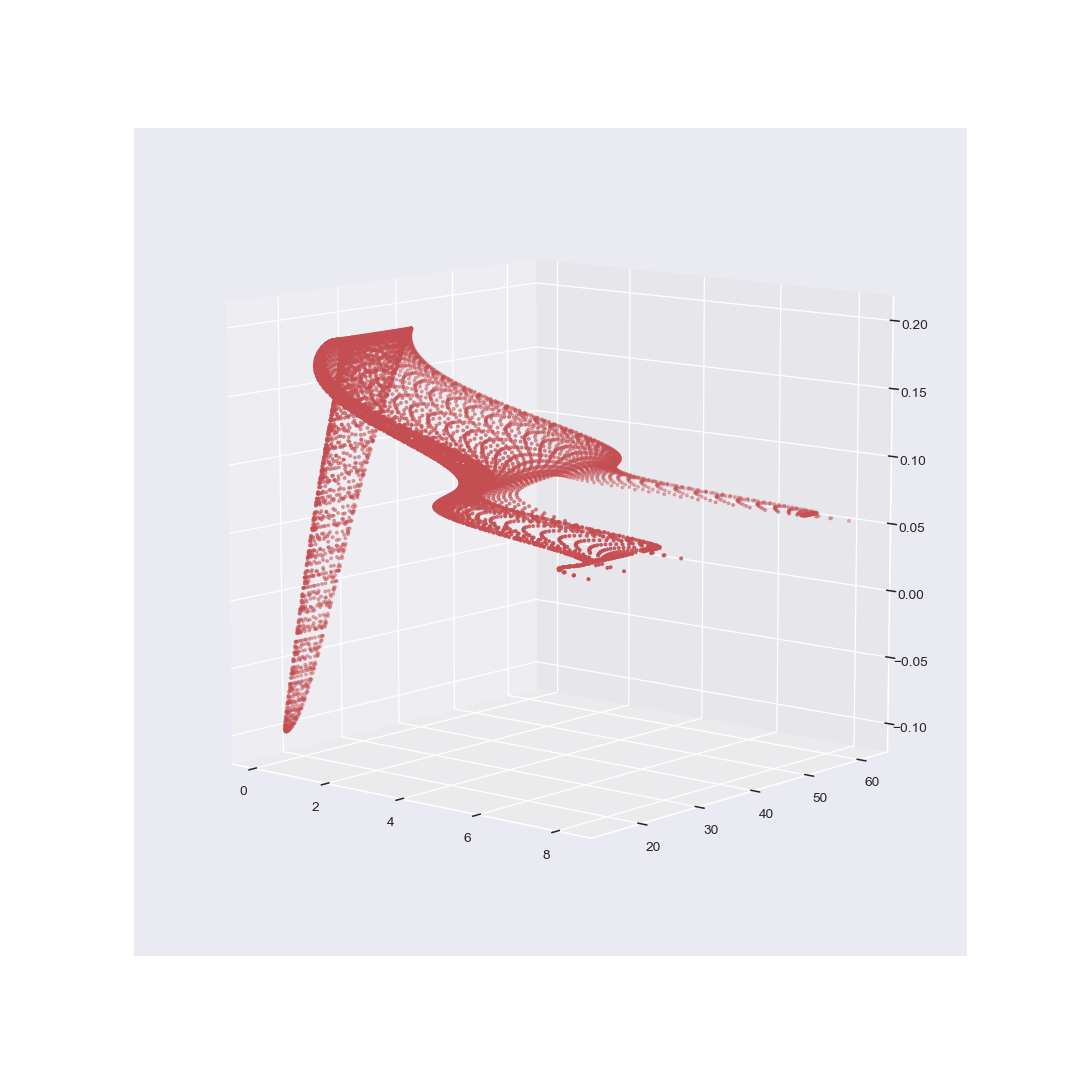

In [8]:
%matplotlib notebook

figure = plt.figure(figsize=[12, 12])
axes = figure.add_subplot(111, projection='3d')

values = np.apply_along_axis(viennet_objective, 1, grid)
axes.scatter(values[:, 0], values[:, 1], values[:, 2], c="r", s=5)

In [10]:
optimzier = SPEAOptimizer(
    viennet_objective,
    n_dim=2,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="mean_shift"
)

In [15]:
history = optimzier.optimize(
    generations=400,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.6,
    reducing_period=5,
    search_range=((-1, 1),),
    mutation_strength=1.2,
    clustering_parameters={"max_iter": 50},
    silent=False,
    mutation_schedule="const",
    crossover_schedule="const",
    strength_schedule="const",
    logging=False,
    logging_path="../data/zdt_n1.csv",
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [02:43<00:00,  2.34it/s]


<IPython.core.display.Javascript object>


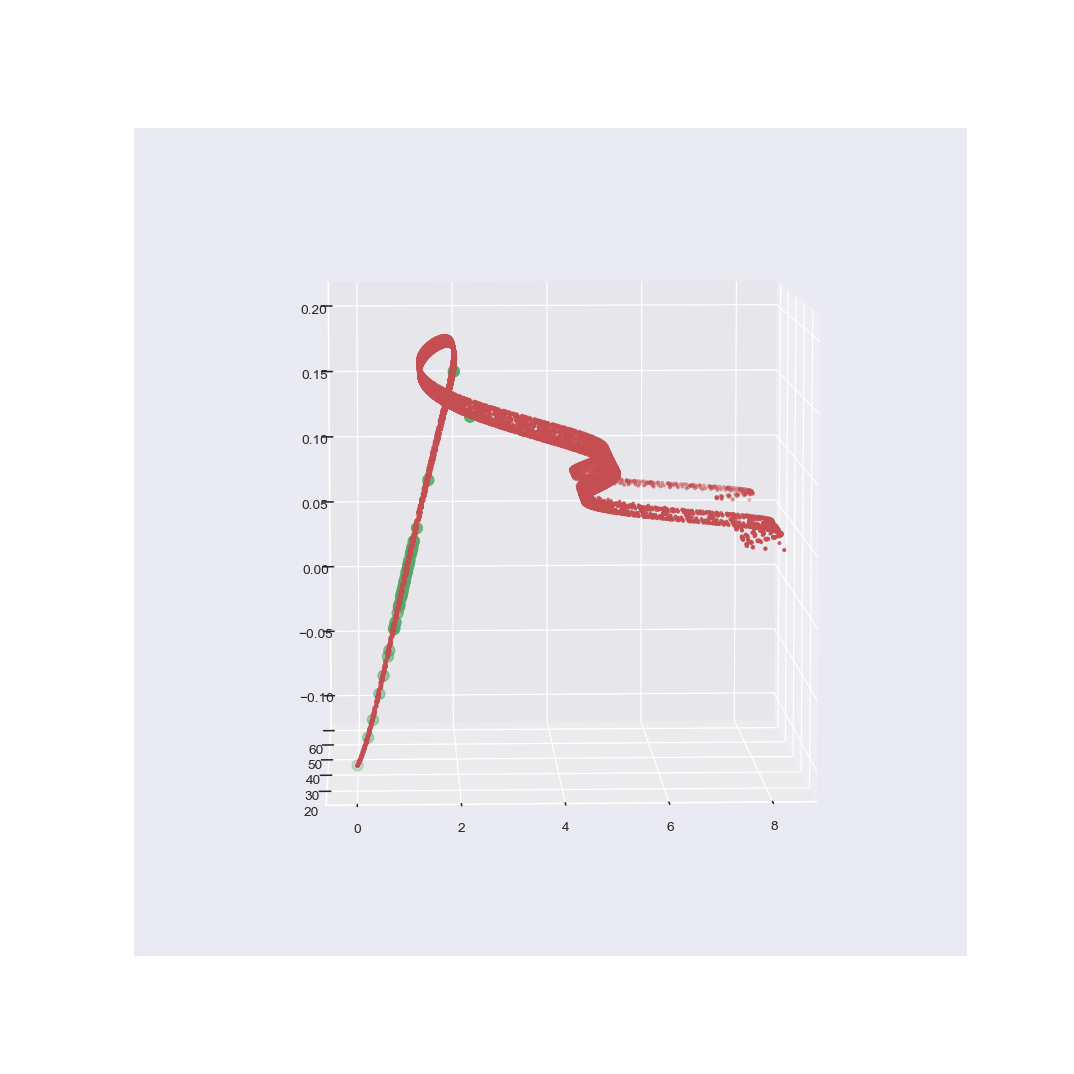

In [16]:
%matplotlib notebook

figure = plt.figure(figsize=[12, 12])
axes = figure.add_subplot(111, projection='3d')

pareto_values = np.apply_along_axis(viennet_objective, 1, optimzier.pareto_front)

axes.scatter(values[:, 0], values[:, 1], values[:, 2], c="r", s=5)
axes.scatter(pareto_values[:, 0], pareto_values[:, 1], pareto_values[:, 2], c="g", s=80)